<a href="https://colab.research.google.com/github/ele9996/NetworkDynamicsAndLearningLabs/blob/main/HMW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
np.random.seed(seed=99)

In [116]:

Lambda = [
[0, 2/5, 1/5, 0, 0 ],
[0, 0, 3/4, 1/4, 0 ],
[1/2, 0, 0, 1/2, 0],
[0, 0, 1/3, 0, 2/3],
[0, 1/3, 0, 1/3, 0]]
w = np.sum(Lambda, axis=1)
w_star = np.max(w)
Q = Lambda/w_star 
Q = Q + np.diag(np.ones(len(w))-np.sum(Q,axis=1))


#Exercise 1

##a

In [117]:

def MySim(steps,start,finish):

  Q_cum = np.cumsum(Q, axis=1)
  time_last = np.zeros(steps, dtype=float)



  #I do 1000 steps and I exit only when I found my node
  for i in range(steps):
    #we start in position 1 
    pos = []
    pos.insert(0, start) 
    #array containing transition times from a state to another
    trans_times = []
    trans_times.insert(0,0)
    
    n=0
    t_next = -np.log(np.random.rand())/w_star

    while True:
        pos.append(np.argwhere(Q_cum[pos[n]] > np.random.rand())[0][0])
        trans_times.append(trans_times[n] + t_next)
        n += 1
        if pos[n] == finish:
          break

    #since transition times accumulates I only take last times    
    time_last[i] = trans_times[-1]
    #I take last time for each step

  #and I compute the average
  avg=np.average(time_last)
  return avg


In [118]:
avg_time=MySim(1000,1,1)
print("Average return time: {}".format(avg_time))

Average return time: 6.738973642535987


##b

In [119]:

D = np.diag(w)
P = np.linalg.inv(D) @ Lambda


n_nodes = len(P)
S = [1]
R = [node for node in range(n_nodes) if node not in S]
hatP = P[np.ix_(R, R)]
hatw=w[np.ix_(R)]
hatx = np.linalg.solve((np.identity(len(R))-hatP),np.ones(len(R))/hatw)


hitting_s = np.zeros(n_nodes)
hitting_s[R] = hatx

ret_time=1/w[1]+np.dot(P[1,:],hitting_s)

print("Returning time:{}".format(ret_time))

Returning time:6.749999999999998


##c

In [120]:
avg_time=MySim(1000,0,4)
print("Hitting time: {}".format(avg_time))

Hitting time: 8.114122607905058


##d

In [121]:
n_nodes = len(P)

S = [4]

R = [node for node in range(n_nodes) if node not in S]


hatP = P[np.ix_(R, R)]
hatw = w[np.ix_(R)]

hatx = np.linalg.solve(np.identity(len(R))-hatP,np.ones(len(R))/hatw)

hitting_s = np.zeros(n_nodes)

hitting_s[R] = hatx

print("Theoretical hitting time: {}".format(hitting_s[[0]]))

Theoretical hitting time: [8.78571429]


#Exercise 2

##2a: Particle perspective

In [122]:
result=np.zeros(100)

#you compute 1000 simulation for each of the 100 particles and then do the avg
for particle in range(100):
  
  result[particle]=MySim(1000,1,1)

print("Average time:{}".format(np.average(result)))


Average time:6.717380925247137


##2b : Node Perspective

In [123]:
time_units=60 
n_particles=100  # Equal to the rate


transition_times = []
transition_times.append(0)
t_next=transition_times[0]
occurrences = np.zeros(5, dtype = float)
occurrences[0] = n_particles

distr_nodes_time = np.array([[100., 0, 0, 0, 0 ]], dtype=float)

Q_cum = np.cumsum(Q, axis=1)
t_next = -np.log(np.random.rand())/n_particles



while t_next<time_units:
  t_next = transition_times[-1]-np.log(np.random.rand())/n_particles
  transition_times.append(t_next)
  P_cum = np.cumsum(occurrences/n_particles)
  start= np.argwhere(P_cum > np.random.rand())[0][0]
  end = np.argwhere(Q_cum[start] > np.random.rand())[0][0]
  occurrences[end] += 1
  occurrences[start] -= 1
  distr_nodes_time= np.concatenate((distr_nodes_time, [occurrences]), axis = 0)




print("Average number of particles that touches each node at the end of the simulation:")

print(np.average(distr_nodes_time, axis=0))





Average number of particles that touches each node at the end of the simulation:
[19.10177652 16.03602856 22.44313465 21.72521999 20.69384028]


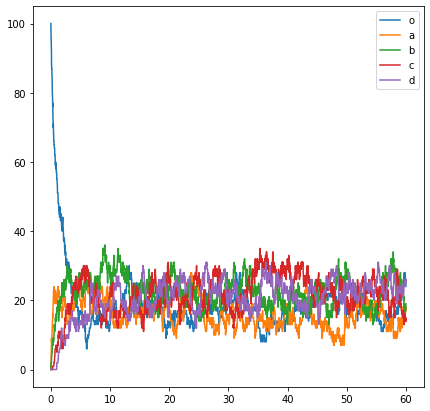

In [124]:
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)
labels={0:'o',1:'a',2:'b',3:'c',4:'d'}
for node in range(n_nodes):
    
    ax.plot(transition_times, distr_nodes_time[:, node], label=labels[node])
    
ax.legend()



#Exercise 3

In [125]:

Lambda_open = [
[0, 2/3, 1/3, 0, 0 ],
[0, 0, 1/4, 1/4, 2/4 ],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1],
[0, 0, 0, 0, 0]]

w = np.sum(Lambda_open, axis=1)
w_star = np.max(w)
Q = Lambda_open/w_star
Q = Q + np.diag( np.ones(len(w)) - np.sum(Q, axis=1) )



In [126]:
def MySim(rate,time_units,ex):

 
  transition_times = []
  transition_times.append(0)
  t_next=transition_times[0]
  occurrencies = np.zeros(5)
  distr_nodes_time = np.array([[0, 0, 0, 0, 0]])
  
  Q_cum = np.cumsum(Q, axis=1)
  
  while t_next < time_units:
    
    temp = np.zeros(6)
    
    if ex=='a':
      num_part = rate
    if ex=='b':
      rate_tot = rate

    temp[5] = rate
    

    if ex=='a':
      num_part += np.sum(occurrencies)
      for i in range(5):
        temp[i] = occurrencies[i]
      particles_cum = np.cumsum(temp)/num_part
      t_next = transition_times[-1] - np.log(np.random.rand()) /num_part
    
    if ex=='b':
      for i in range(5):
        temp[i] = 1
        rate_tot += 1
      particles_cum = np.cumsum(temp)/rate_tot
      t_next = transition_times[-1] - np.log(np.random.rand()) /rate_tot


    
    start = np.argwhere(particles_cum > np.random.rand())[0][0]


 

    if start == 5:
      occurrencies[0] += 1
    
    elif occurrencies[start]==0 and ex=='b':
      pass
    
    else:
      if start == 4:
        occurrencies[4] -= 1
    
      else:
        end = np.argwhere(Q_cum[start] > np.random.rand())[0][0]
        occurrencies[start] -= 1
        occurrencies[end] += 1
    
    transition_times.append(t_next)
    distr_nodes_time = np.concatenate((distr_nodes_time, [occurrencies]), axis = 0)

  return transition_times,distr_nodes_time
 

##3a
In exercise 3a the goal is to simulate the process in a condition in which the rate of the Poisson clock of each node is equal to the number of particles in it




I now simulate the system with for 60 time units and rate equal to one.

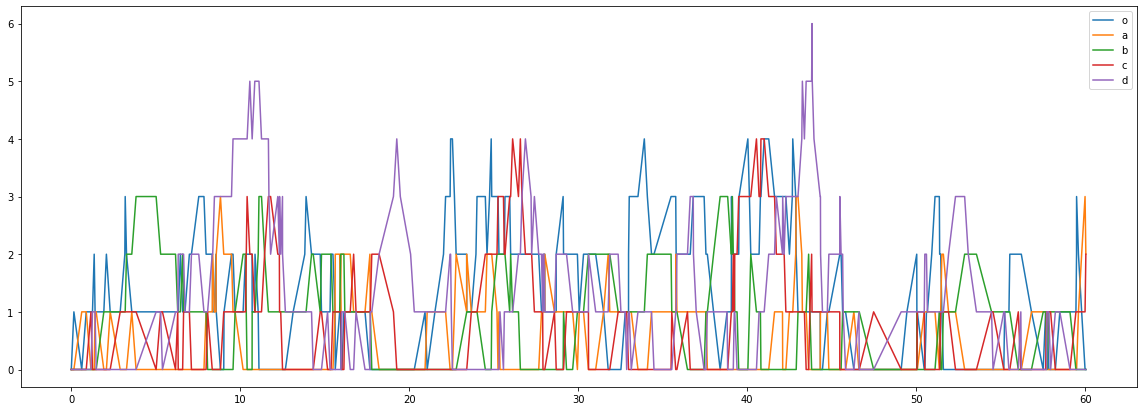

In [127]:
rate_enter=1
time_units=60
node_number=5
transition_times, distr_nodes_time  = MySim(rate_enter,time_units, 'a')

fig, ax = plt.subplots(figsize=(20,7))
labels={0:'o',1:'a',2:'b',3:'c',4:'d'}

for node in range(node_number):
  ax.plot(transition_times, distr_nodes_time[:, node], label=labels[node])

ax.legend()
plt.show()

I now try to understand which can be the largest input rate that the system can handle without blowing up.

I first try with rate_enter=2

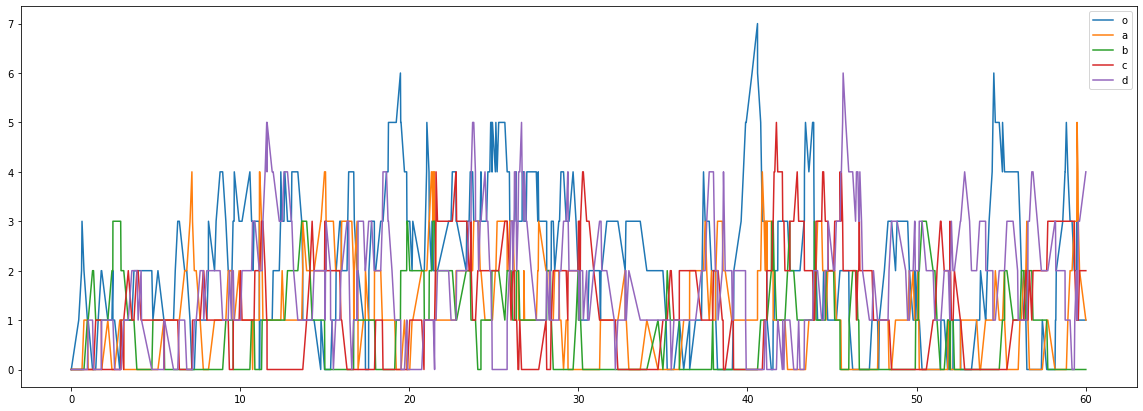

In [128]:
rate_enter=2
time_units=60
node_number=5
transition_times, distr_nodes_time  = MySim(rate_enter,time_units, 'a')

fig, ax = plt.subplots(figsize=(20,7))
labels={0:'o',1:'a',2:'b',3:'c',4:'d'}

for node in range(node_number):
  ax.plot(transition_times, distr_nodes_time[:, node], label=labels[node])

ax.legend()
plt.show()

Bu I can notice that nothing has changed so the blowing up rate must be of an higher oreder rate.

I then put rate_enter=100

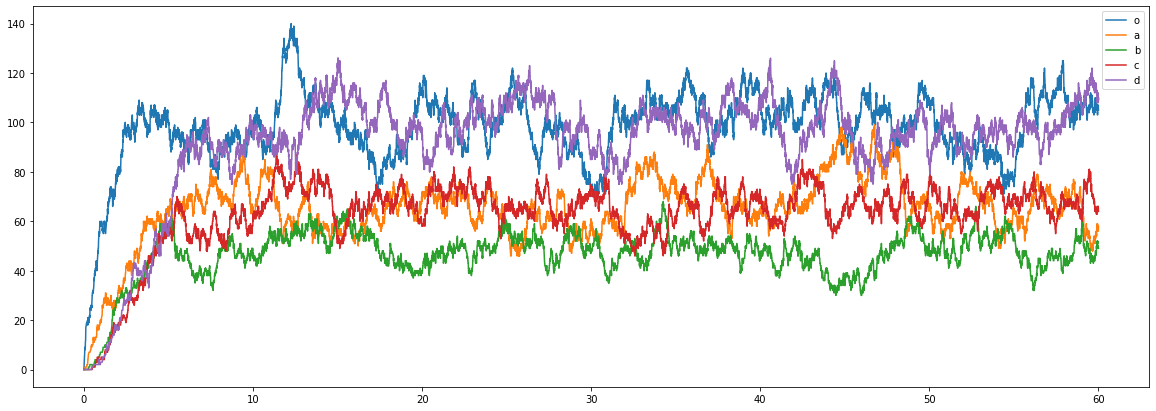

In [129]:
rate_enter=100
time_units=60
node_number=5
transition_times, distr_nodes_time  = MySim(rate_enter,time_units, 'a')

fig, ax = plt.subplots(figsize=(20,7))
labels={0:'o',1:'a',2:'b',3:'c',4:'d'}

for node in range(node_number):
  ax.plot(transition_times, distr_nodes_time[:, node], label=labels[node])

ax.legend()
plt.show()

From the pattern here I can notice that, even if there is still lots of noise that can be reduced by increasing again the rate, each node tends to stabilize to a certain average value, meaning that the system cannot blow up while rate increases.



##3b
The goal of this point is to simulate the system in a condition in which the rate of each node is fixed and equal to 1.

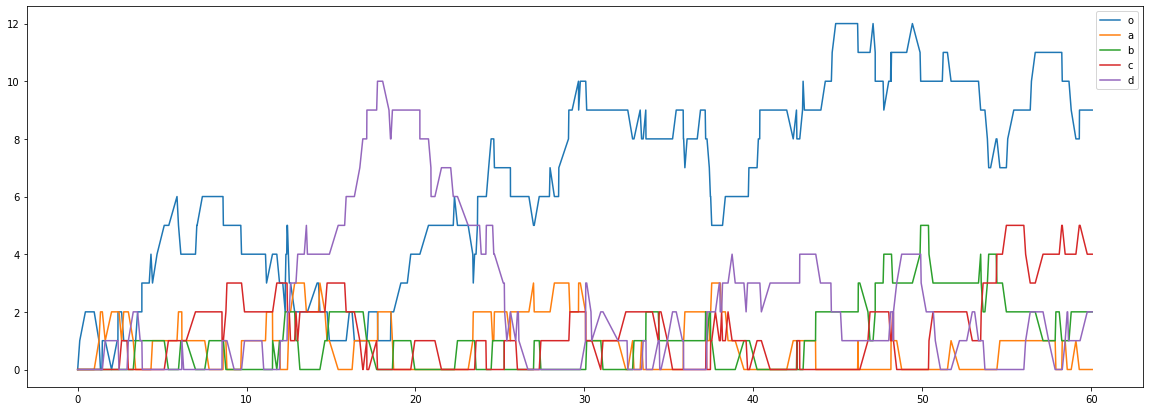

In [130]:
rate_enter=1
time_units=60
node_number=5
transition_times, distr_nodes_time  = MySim(rate_enter,time_units, 'b')

fig, ax = plt.subplots(figsize=(20,7))
labels={0:'o',1:'a',2:'b',3:'c',4:'d'}

for node in range(node_number):
  ax.plot(transition_times, distr_nodes_time[:, node], label=labels[node])

ax.legend()
plt.show()


By plotting the results I notice that node 0 seems to show a divergent pattern.

I decided to test it by applying an higher value of rate_enter.

I tried rate_enter=2

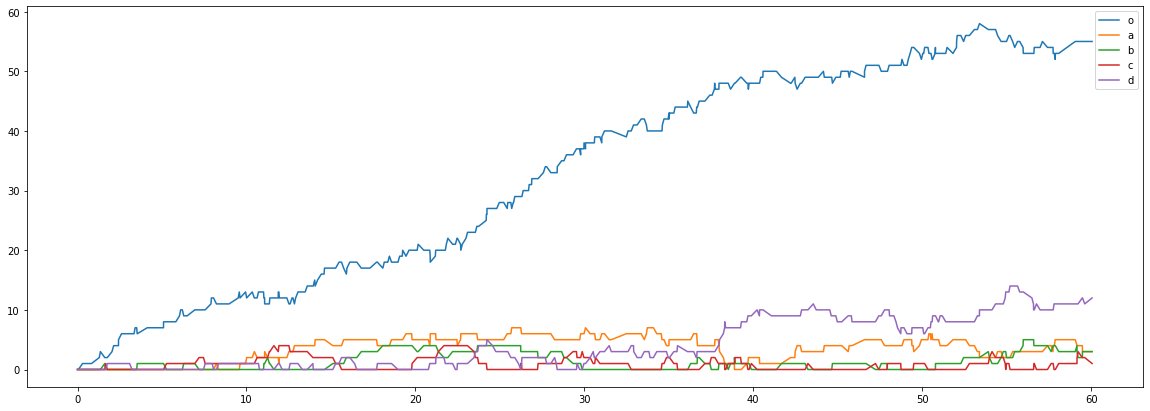

In [131]:
rate_enter=2
time_units=60
node_number=5
transition_times, distr_nodes_time  = MySim(rate_enter,time_units, 'b')

fig, ax = plt.subplots(figsize=(20,7))
labels={0:'o',1:'a',2:'b',3:'c',4:'d'}

for node in range(node_number):
  ax.plot(transition_times, distr_nodes_time[:, node], label=labels[node])

ax.legend()
plt.show()



I found my thoughts to be true, for higher values of rate the system diverges.

I now try to search for the higher value of rate_enter that assures the convergence of the system.

I first tried an extremely low value to have a basis to that guarantees convergence.

I apply rate_enter=0.5


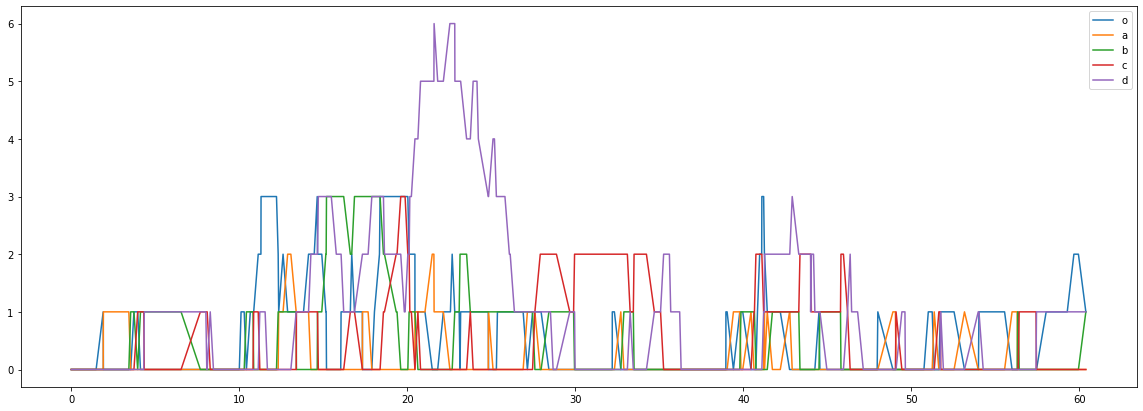

In [132]:
rate_enter=0.5
time_units=60
node_number=5
transition_times, distr_nodes_time  = MySim(rate_enter,time_units, 'b')

fig, ax = plt.subplots(figsize=(20,7))
labels={0:'o',1:'a',2:'b',3:'c',4:'d'}

for node in range(node_number):
  ax.plot(transition_times, distr_nodes_time[:, node], label=labels[node])

ax.legend()
plt.show()



Here it is possible to notice that the system converges as predicted

Now I try to apply higher values to see where the system diverges

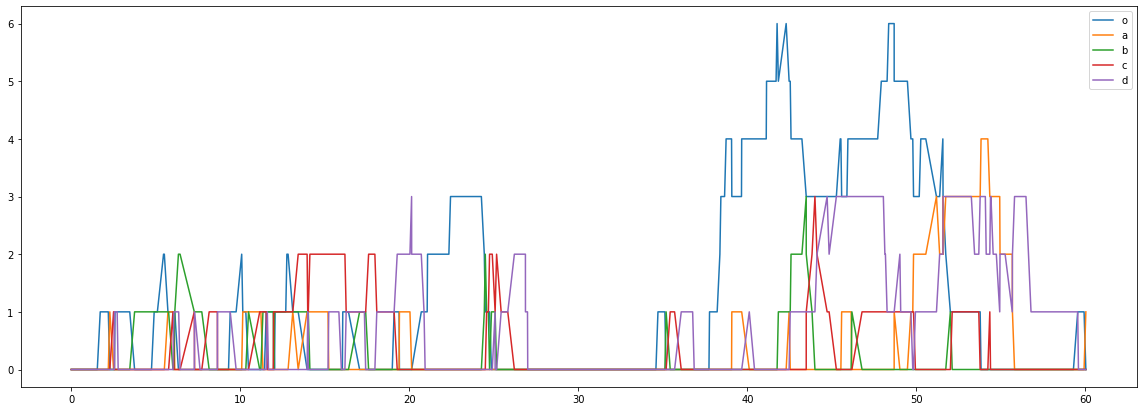

In [133]:
rate_enter=0.6
time_units=60
node_number=5
transition_times, distr_nodes_time  = MySim(rate_enter,time_units, 'b')

fig, ax = plt.subplots(figsize=(20,7))
labels={0:'o',1:'a',2:'b',3:'c',4:'d'}

for node in range(node_number):
  ax.plot(transition_times, distr_nodes_time[:, node], label=labels[node])

ax.legend()
plt.show()

By performing several attempts I identify 0.6 to be the highest value for which the system doesn't blow up.

The system does perform well also with 0.7 but the noise it's too much to be determined for sure.